In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

file_jan = '/mnt/data06/andyxia/data/Jan/Jan_bomb_data.json'
file_feb = '/mnt/data06/andyxia/data/Feb/Feb_bomb_data.json'
file_mar = '/mnt/data06/andyxia/data/Mar/Mar_bomb_data.json'
file_apr = '/mnt/data06/andyxia/data/Apr/Apr_bomb_data.json'
file_may = '/mnt/data06/andyxia/data/May/May_bomb_data.json'
file_jun = '/mnt/data06/andyxia/data/Jun/Jun_bomb_data.json'
file_jul = '/mnt/data06/andyxia/data/Jul/Jul_bomb_data.json'
df1 = pd.read_json(file_jan)
df2 = pd.read_json(file_feb)
df3 = pd.read_json(file_mar)
df4 = pd.read_json(file_apr)
df5 = pd.read_json(file_may)
df6 = pd.read_json(file_jun)
df7 = pd.read_json(file_jul)

In [3]:
def read_df(df):
    # data_array=df.to_numpy()
    stat=[]
    for index, row in df.iterrows():
        # print(df['original_demo'])
        if row['error'] != 'error set':
            stat.append(row['original_demo'])
    return stat

In [4]:
files=read_df(df1)+read_df(df2)+read_df(df3)+read_df(df4)+read_df(df5)+read_df(df6)+read_df(df7)
# files=df1['original_demo']+df2['original_demo']+df3['original_demo']+df4['original_demo']+df6['original_demo']
# stats = sum([read_df(df1),read_df(df2),read_df(df3),read_df(df4),read_df(df6)], [])
len(files)

556

In [5]:
# files=[]
# count=0
# while count<len(stats):
#     files.append(stats[count][1])
#     count+=1

# print(files)
team_names = set()

for filename in files:
    # Extract the part of the filename that includes team names
    base_name = filename.split('/')[-1]  # Get the part after 'Jan/'
    team_part = base_name.split('-m')[0]  # Remove the match part like '-m3'
    
    # The teams are now separated by '-vs-'
    teams = team_part.split('-vs-')
    
    # Add extracted teams to the set (duplicates will not be added)
    team_names.update(teams)

In [6]:
len(team_names)

401

In [7]:
def read(files):
    stat=[]
    for df in files:
        data_array=np.array(df)
        # print(data_array)
        for entry in data_array:
            # print(entry[0])
            if entry[0]!='error set':
                # print(isinstance(entry[2],dict))
                for value in entry:
                    if isinstance(value,dict):
                        if value['T']['living_players'] is not None:
                            for player in value['T']['living_players']:
                                stat.append(player)
                        if value['T']['dead_players'] is not None:
                            for player in value['T']['dead_players']:
                                player['is_alive']=False
                                player['hp']=0
                                stat.append(player)
                        if value['CT']['living_players'] is not None:
                            for player in value['CT']['living_players']:
                                stat.append(player)
                        if value['CT']['dead_players'] is not None:
                            for player in value['CT']['dead_players']:
                                player['is_alive']=False
                                player['hp']=0
                                stat.append(player)
    return stat

In [8]:
demofiles=[df1,df2,df3,df4,df5,df6,df7]
stat=read(demofiles)
live=[]
dead=[]
for player in stat:
    if player['is_alive']:
        live.append(player)
    else:
        dead.append(player)
df_live=pd.DataFrame(live)
df_dead=pd.DataFrame(dead)
df_team=pd.DataFrame(stat)
# stat 

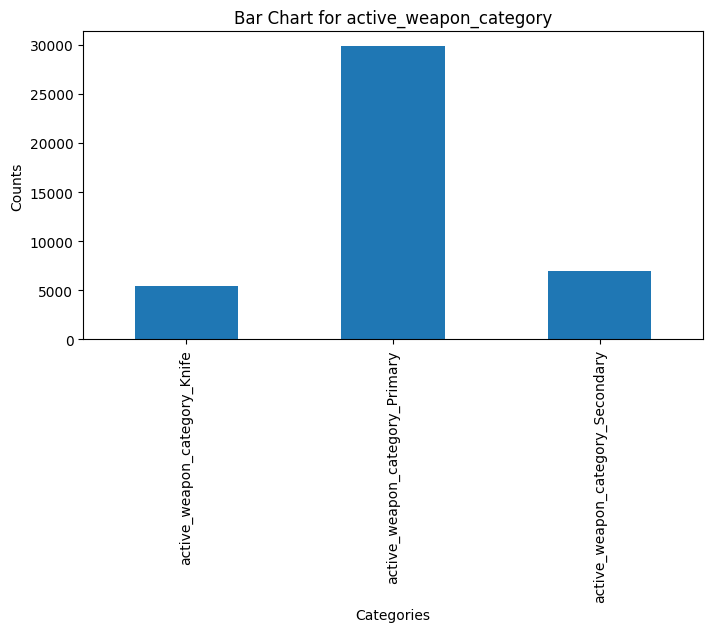

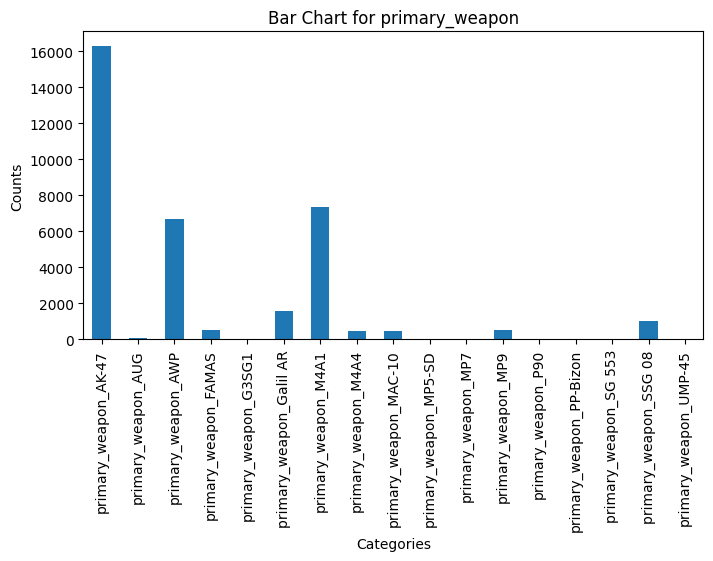

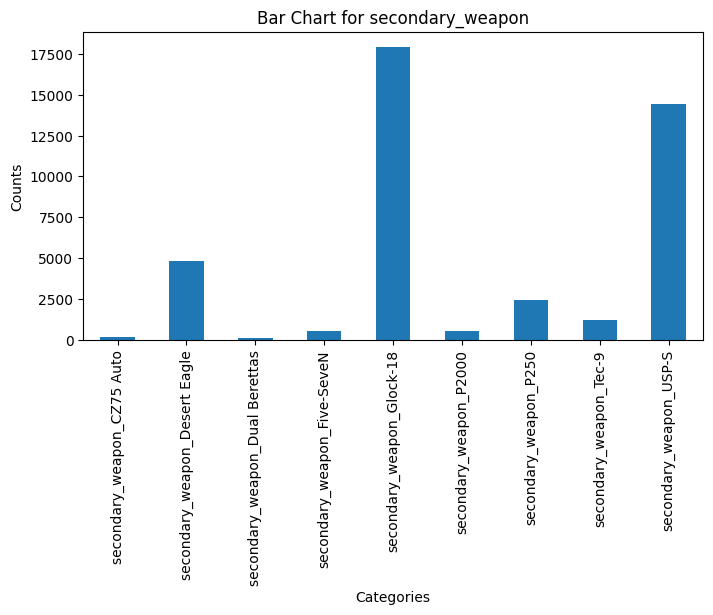

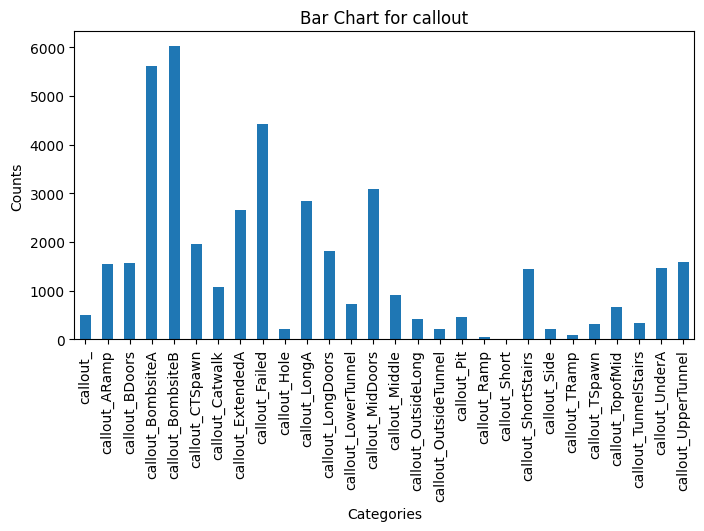

In [9]:
columns_to_encode = ['active_weapon_category', 'primary_weapon', 'secondary_weapon', 'callout']
# print(df1.columns)

encoded_dfs = {}

for column in columns_to_encode:
    encoded_df = pd.get_dummies(df_live[column], prefix=column)
    encoded_dfs[column] = encoded_df
    encoded_sum = encoded_df.sum()
    plt.figure(figsize=(8, 4))
    encoded_sum.plot(kind='bar')
    plt.title(f'Bar Chart for {column}')
    plt.ylabel('Counts')
    plt.xlabel('Categories')
    plt.show()

In [10]:
df1=pd.get_dummies(df_live, columns=['active_weapon_category','primary_weapon','secondary_weapon','callout'])
df1.describe()

,hp,armor,equipment_value,cash,cash_spend_this_round,round_damage,grenades_left,flashes_left,smokes_left,molotovs_left,total_kills,round_kills,total_deaths,velocityX,velocityY,velocityZ,viewX,viewY,average_damage_per_round
count,42299.000000,42299.000000,42299.000000,42299.000000,42299.000000,42299.000000,42299.000000,42299.000000,42299.000000,42299.000000,42299.000000,42299.000000,42299.000000,42299.000000,42299.000000,42299.000000,42299.000000,42299.000000,42299.000000
mean,83.482848,85.779735,4434.617840,2149.072082,2795.340315,50.738528,0.086692,0.383177,0.226128,0.096787,18.250904,0.481288,17.533984,-0.271004,-4.268161,0.191214,191.568128,127.831981,73.510202
std,27.410393,28.591414,1873.302242,2542.633596,1958.385601,66.453900,0.281387,0.630776,0.418328,0.295671,6.188544,0.706554,4.682874,92.364509,91.184913,41.745432,101.809581,165.596816,17.834463
min,1.000000,0.000000,200.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,2.000000,-299.606445,-440.777679,-607.381592,0.000000,0.000000,14.740741
25%,74.000000,88.000000,3850.000000,300.000000,900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,0.000000,15.000000,-24.499110,-30.889622,0.000000,102.727661,3.372803,61.261905
50%,100.000000,99.000000,4800.000000,1200.000000,2650.000000,10.000000,0.000000,0.000000,0.000000,0.000000,18.000000,0.000000,18.000000,0.000000,0.000000,0.000000,206.147461,8.706665,72.680851
75%,100.000000,100.000000,5500.000000,3100.000000,4450.000000,100.000000,0.000000,1.000000,0.000000,0.000000,22.000000,1.000000,20.000000,24.402549,20.277504,0.000000,270.705872,353.572998,84.681818
max,100.000000,100.000000,8250.000000,16000.000000,12700.000000,437.000000,1.000000,2.000000,1.000000,1.000000,65.000000,4.000000,46.000000,296.232056,274.413727,295.743378,359.989014,359.994507,146.500000


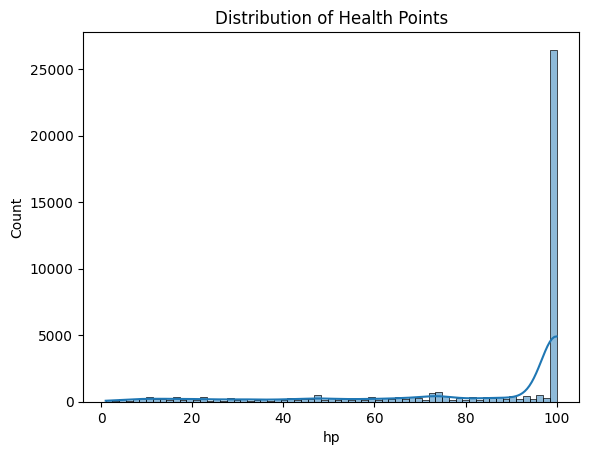

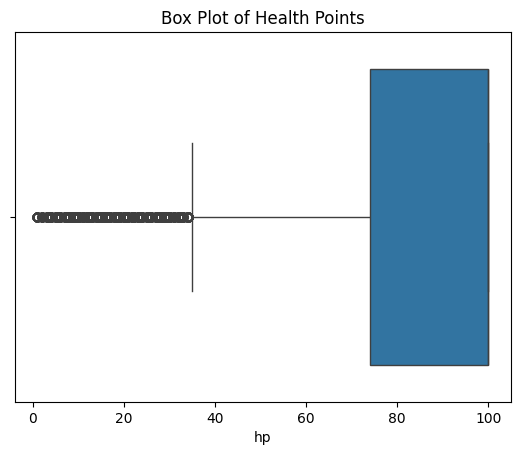

In [11]:
sns.histplot(df1['hp'], kde=True)
plt.title('Distribution of Health Points')
plt.show()

sns.boxplot(x='hp', data=df1)
plt.title('Box Plot of Health Points')
plt.show()

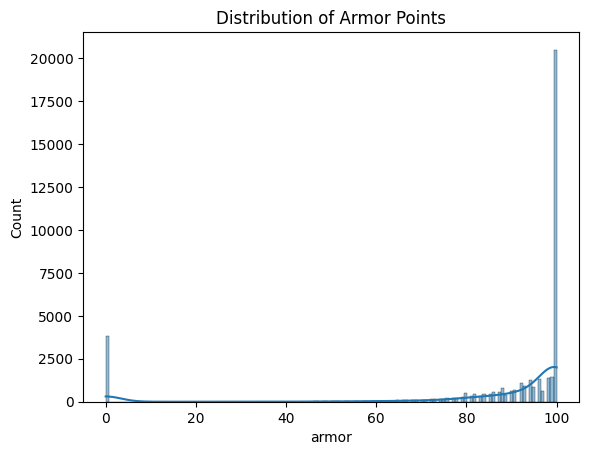

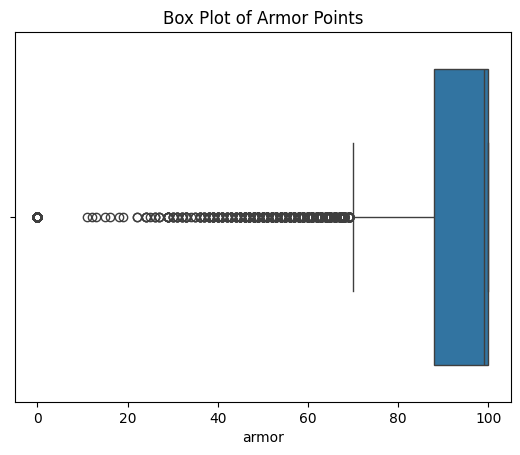

In [12]:
sns.histplot(df1['armor'], kde=True)
plt.title('Distribution of Armor Points')
plt.show()

sns.boxplot(x='armor', data=df1)
plt.title('Box Plot of Armor Points')
plt.show()

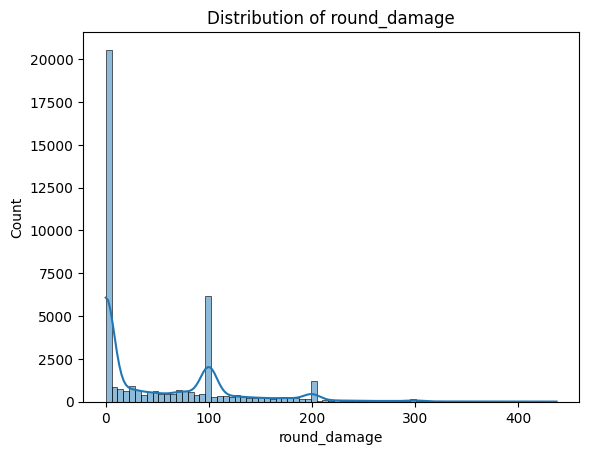

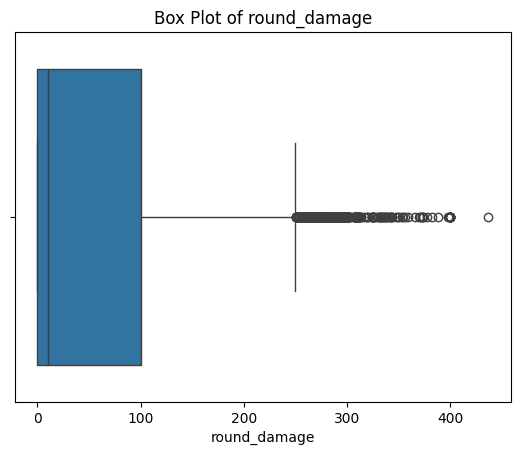

In [13]:
sns.histplot(df1['round_damage'], kde=True)
plt.title('Distribution of round_damage')
plt.show()

sns.boxplot(x='round_damage', data=df1)
plt.title('Box Plot of round_damage')
plt.show()

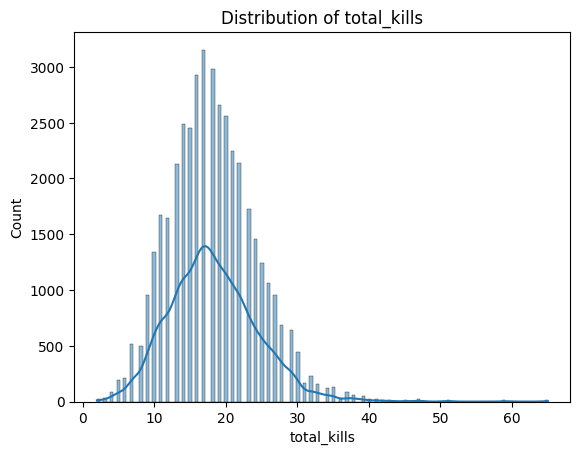

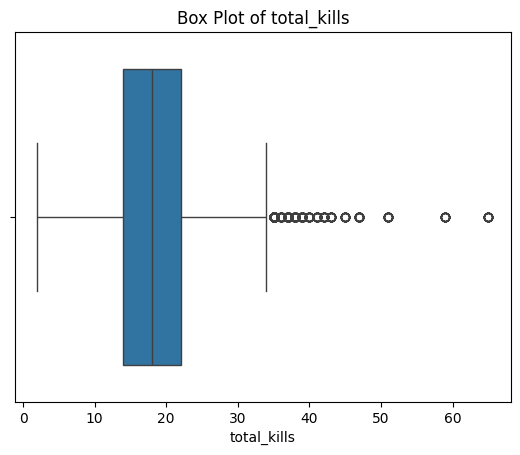

In [14]:
sns.histplot(df1['total_kills'], kde=True)
plt.title('Distribution of total_kills')
plt.show()

sns.boxplot(x='total_kills', data=df1)
plt.title('Box Plot of total_kills')
plt.show()

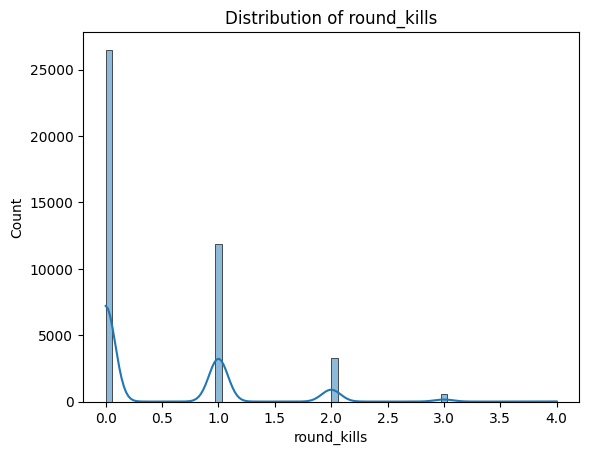

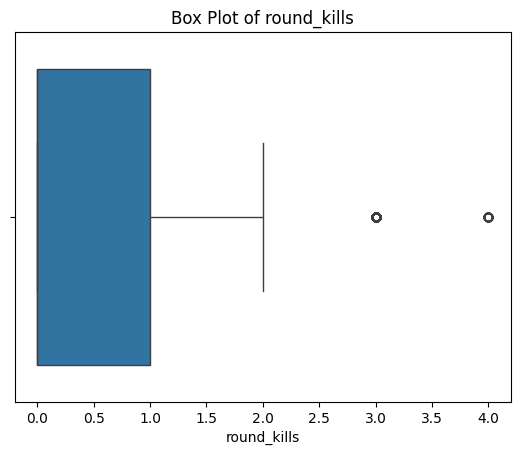

In [15]:
sns.histplot(df1['round_kills'], kde=True)
plt.title('Distribution of round_kills')
plt.show()

sns.boxplot(x='round_kills', data=df1)
plt.title('Box Plot of round_kills')
plt.show()

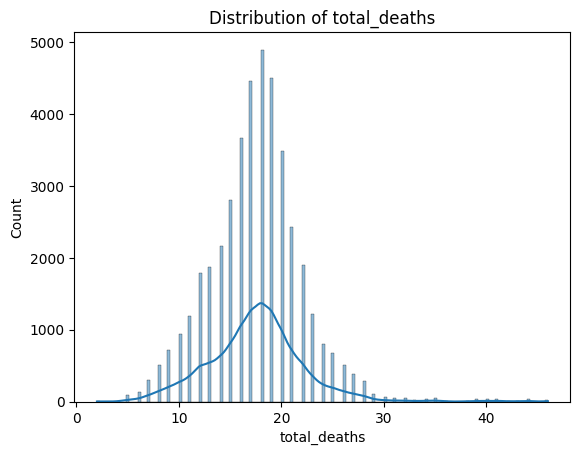

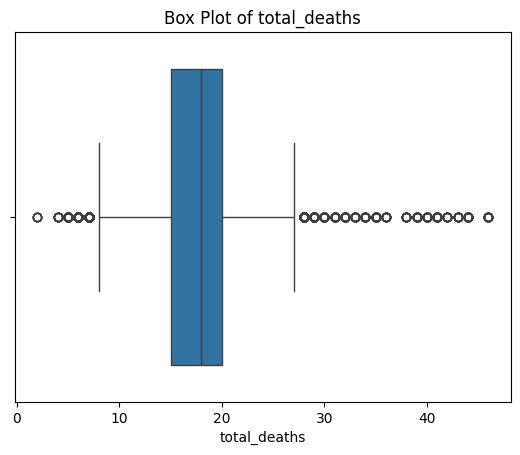

In [16]:
sns.histplot(df1['total_deaths'], kde=True)
plt.title('Distribution of total_deaths')
plt.show()

sns.boxplot(x='total_deaths', data=df1)
plt.title('Box Plot of total_deaths')
plt.show()

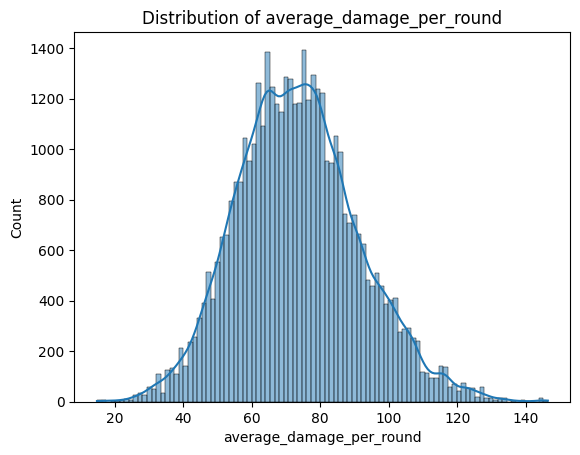

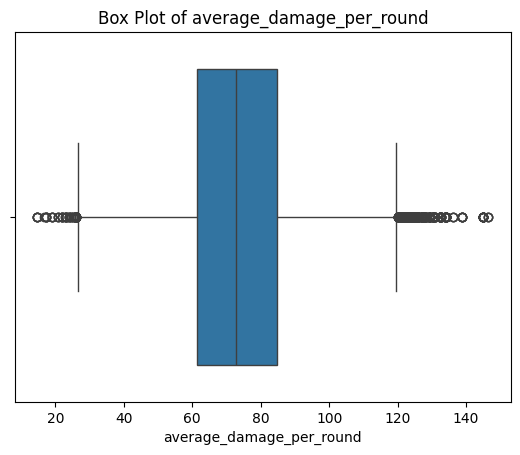

In [17]:
sns.histplot(df1['average_damage_per_round'], kde=True)
plt.title('Distribution of average_damage_per_round')
plt.show()

sns.boxplot(x='average_damage_per_round', data=df1)
plt.title('Box Plot of average_damage_per_round')
plt.show()

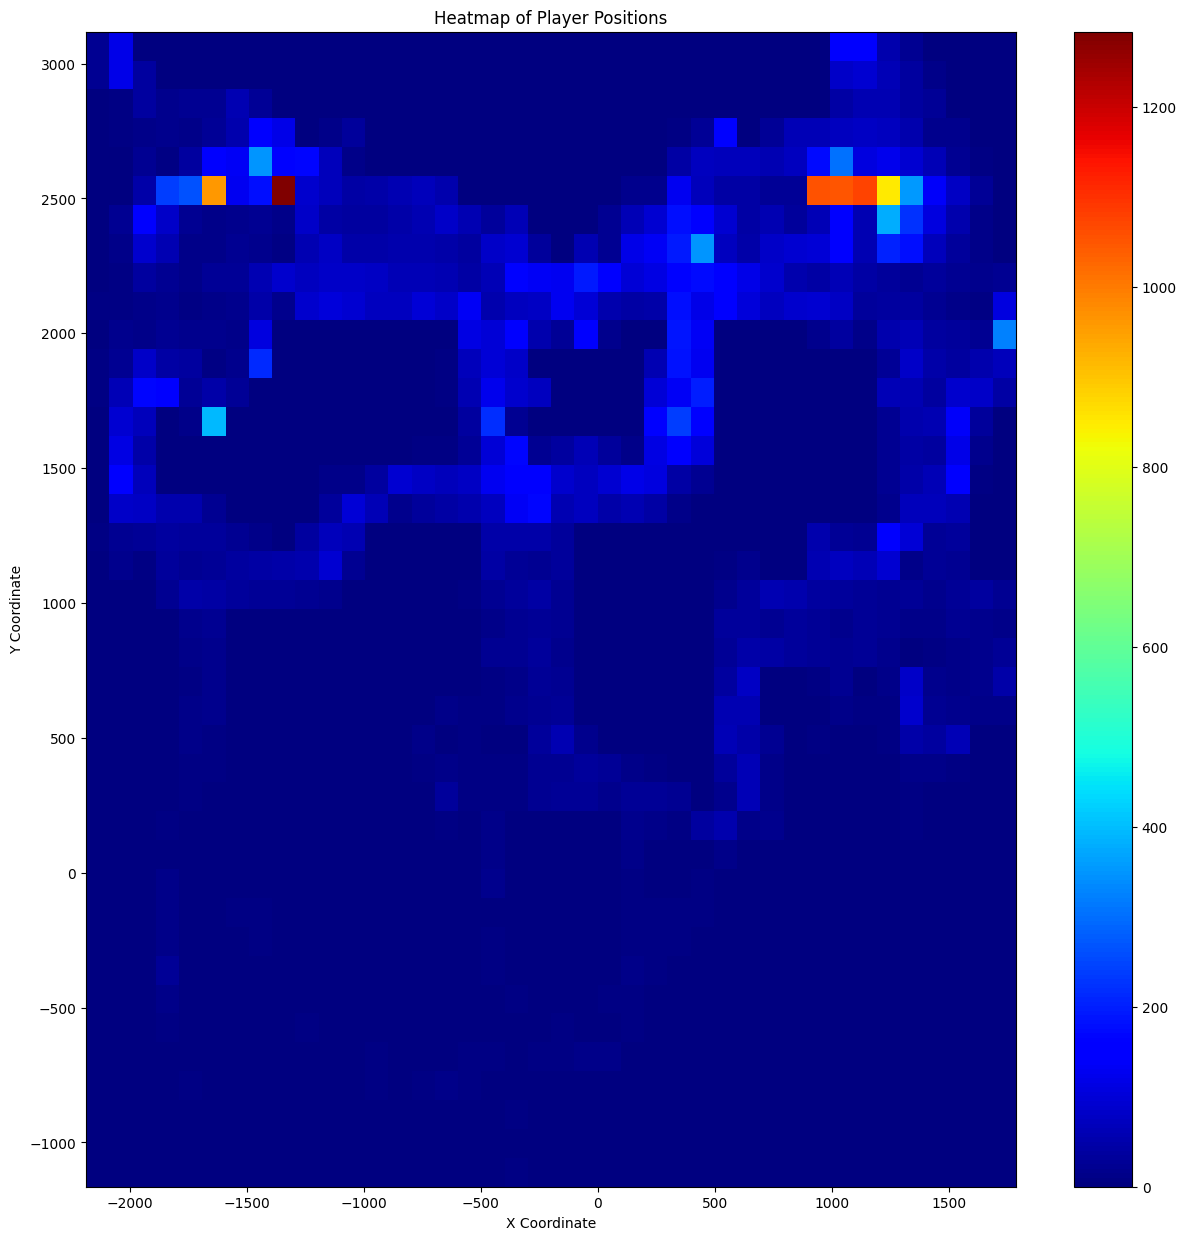

In [18]:
dfx = df1['lastKnownPosition'].apply(lambda x: x[0])
dfy = df1['lastKnownPosition'].apply(lambda x: x[1])

plt.figure(figsize=(15, 15))
plt.hist2d(dfx, dfy, bins=(40,40), cmap=plt.cm.jet)
plt.colorbar()
plt.title("Heatmap of Player Positions")
plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")
plt.show()

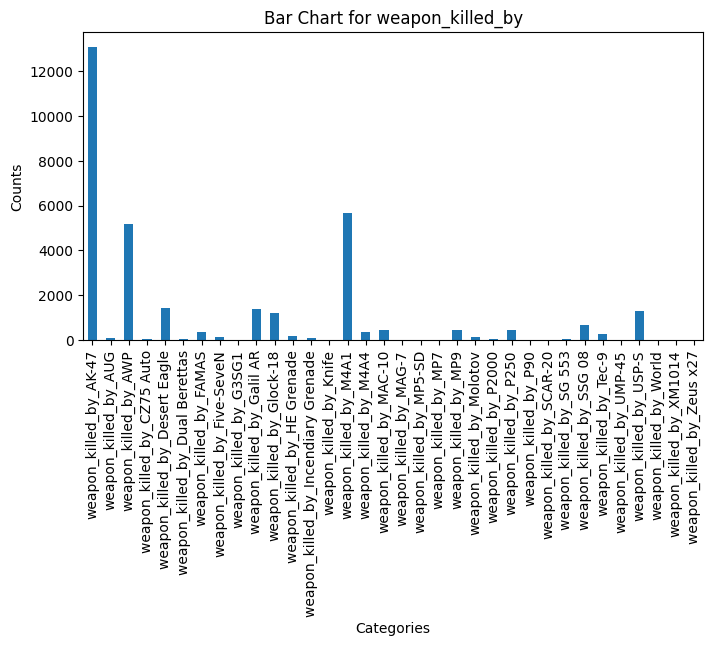

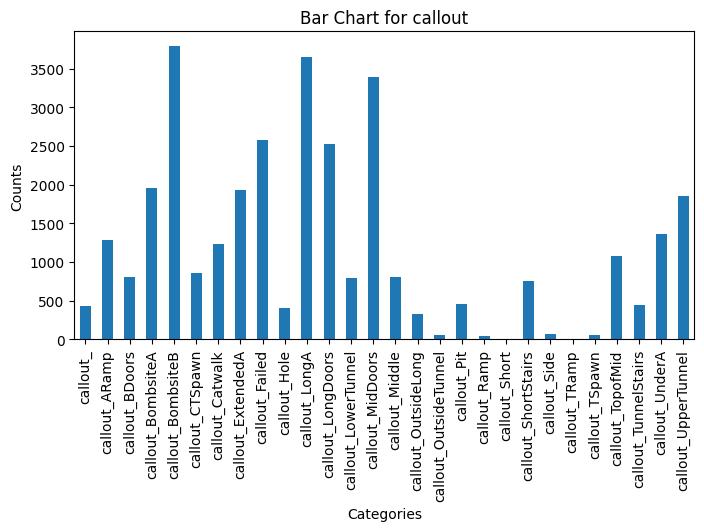

In [19]:
columns_to_encode = ['weapon_killed_by', 'callout']
# print(df1.columns)

encoded_dfs = {}

for column in columns_to_encode:
    encoded_df = pd.get_dummies(df_dead[column], prefix=column)
    encoded_dfs[column] = encoded_df
    encoded_sum = encoded_df.sum()
    plt.figure(figsize=(8, 4))
    encoded_sum.plot(kind='bar')
    plt.title(f'Bar Chart for {column}')
    plt.ylabel('Counts')
    plt.xlabel('Categories')
    plt.show()

In [20]:
df_dead.describe()

,equipment_value,cash,cash_spend_this_round,round_damage,total_kills,round_kills,average_damage_per_round,time_of_death,amount_spent,total_deaths,hp
count,32986.000000,32986.000000,32986.000000,32986.000000,32986.000000,32986.000000,32986.000000,3.298600e+04,32986.000000,32986.000000,32986.0
mean,4258.480871,2048.746438,2701.282362,55.982083,17.591887,0.382799,71.873134,2.201630e+05,32339.560723,18.450524,0.0
std,1987.993215,2405.569025,2001.788580,64.387952,6.323419,0.624821,17.666655,1.396181e+05,24129.090313,4.513708,0.0
min,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,14.740741,0.000000e+00,0.000000,2.000000,0.0
25%,3050.000000,200.000000,800.000000,0.000000,13.000000,0.000000,59.772727,1.059595e+05,12550.000000,16.000000,0.0
50%,4900.000000,1250.000000,2400.000000,32.000000,17.000000,0.000000,71.216216,2.054750e+05,28550.000000,18.000000,0.0
75%,5550.000000,2950.000000,4400.000000,100.000000,21.000000,1.000000,82.750000,3.142438e+05,47400.000000,21.000000,0.0
max,8500.000000,16000.000000,12650.000000,486.000000,65.000000,4.000000,146.500000,1.132331e+06,204650.000000,46.000000,0.0


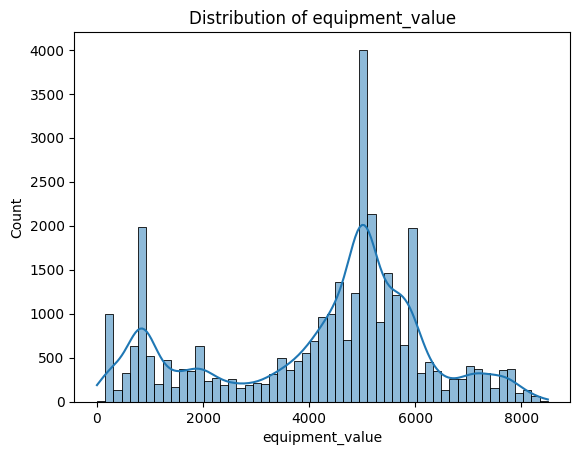

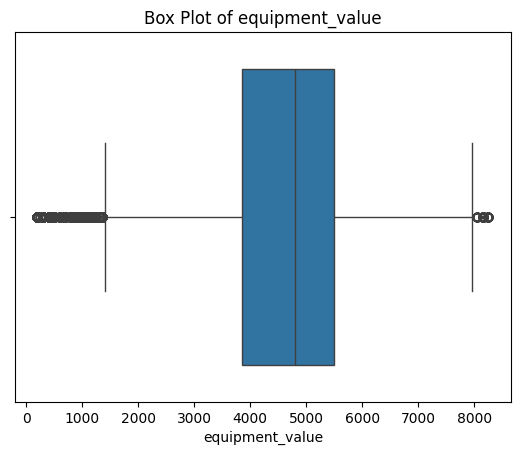

In [21]:
sns.histplot(df_dead['equipment_value'], kde=True)
plt.title('Distribution of equipment_value')
plt.show()

# Box Plot
sns.boxplot(x='equipment_value', data=df1)
plt.title('Box Plot of equipment_value')
plt.show()

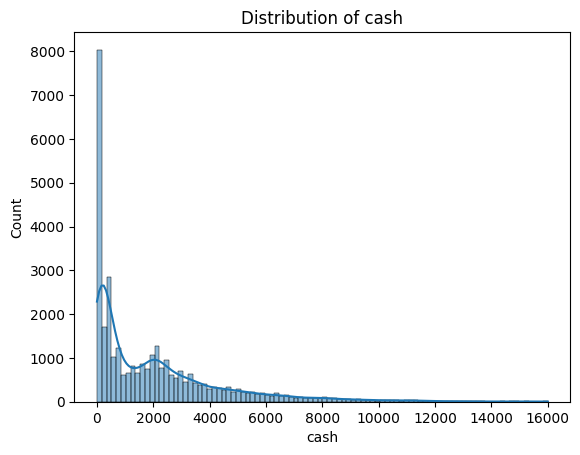

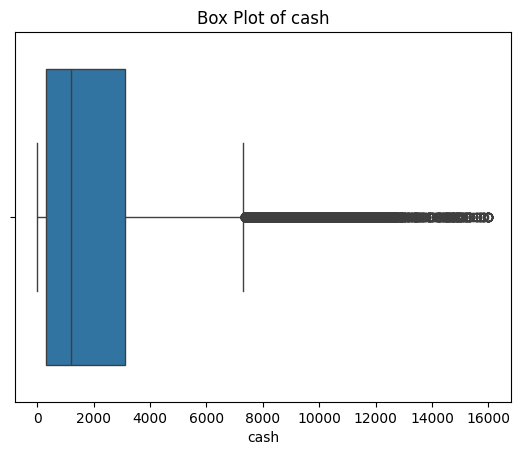

In [22]:
sns.histplot(df_dead['cash'], kde=True)
plt.title('Distribution of cash')
plt.show()

# Box Plot
sns.boxplot(x='cash', data=df1)
plt.title('Box Plot of cash')
plt.show()

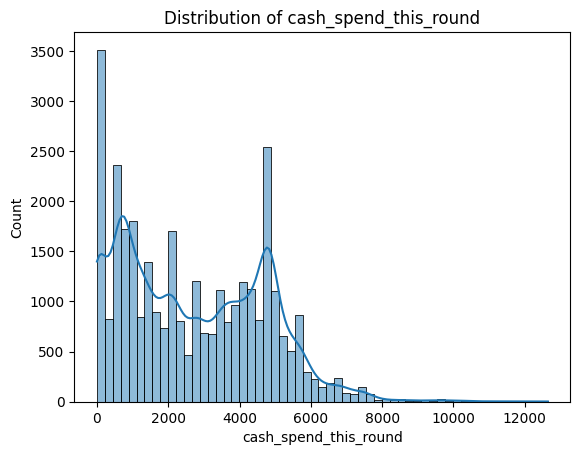

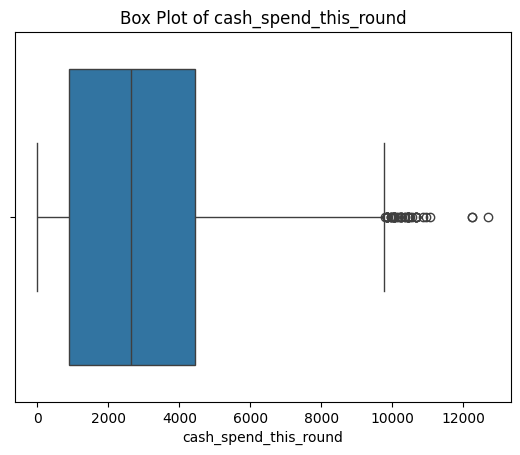

In [23]:
sns.histplot(df_dead['cash_spend_this_round'], kde=True)
plt.title('Distribution of cash_spend_this_round')
plt.show()

# Box Plot
sns.boxplot(x='cash_spend_this_round', data=df1)
plt.title('Box Plot of cash_spend_this_round')
plt.show()

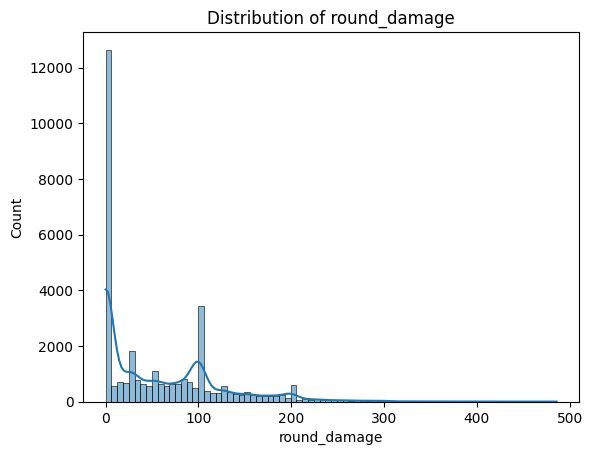

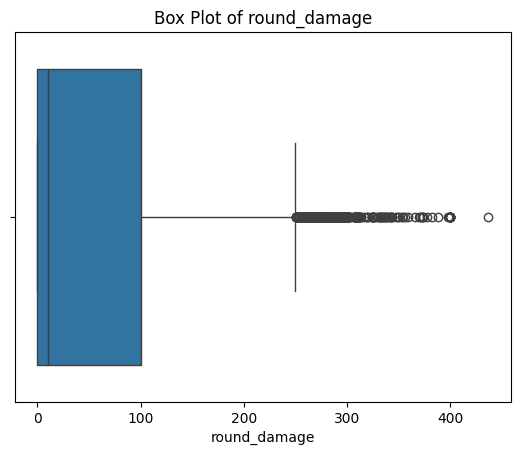

In [24]:
sns.histplot(df_dead['round_damage'], kde=True)
plt.title('Distribution of round_damage')
plt.show()

# Box Plot
sns.boxplot(x='round_damage', data=df1)
plt.title('Box Plot of round_damage')
plt.show()

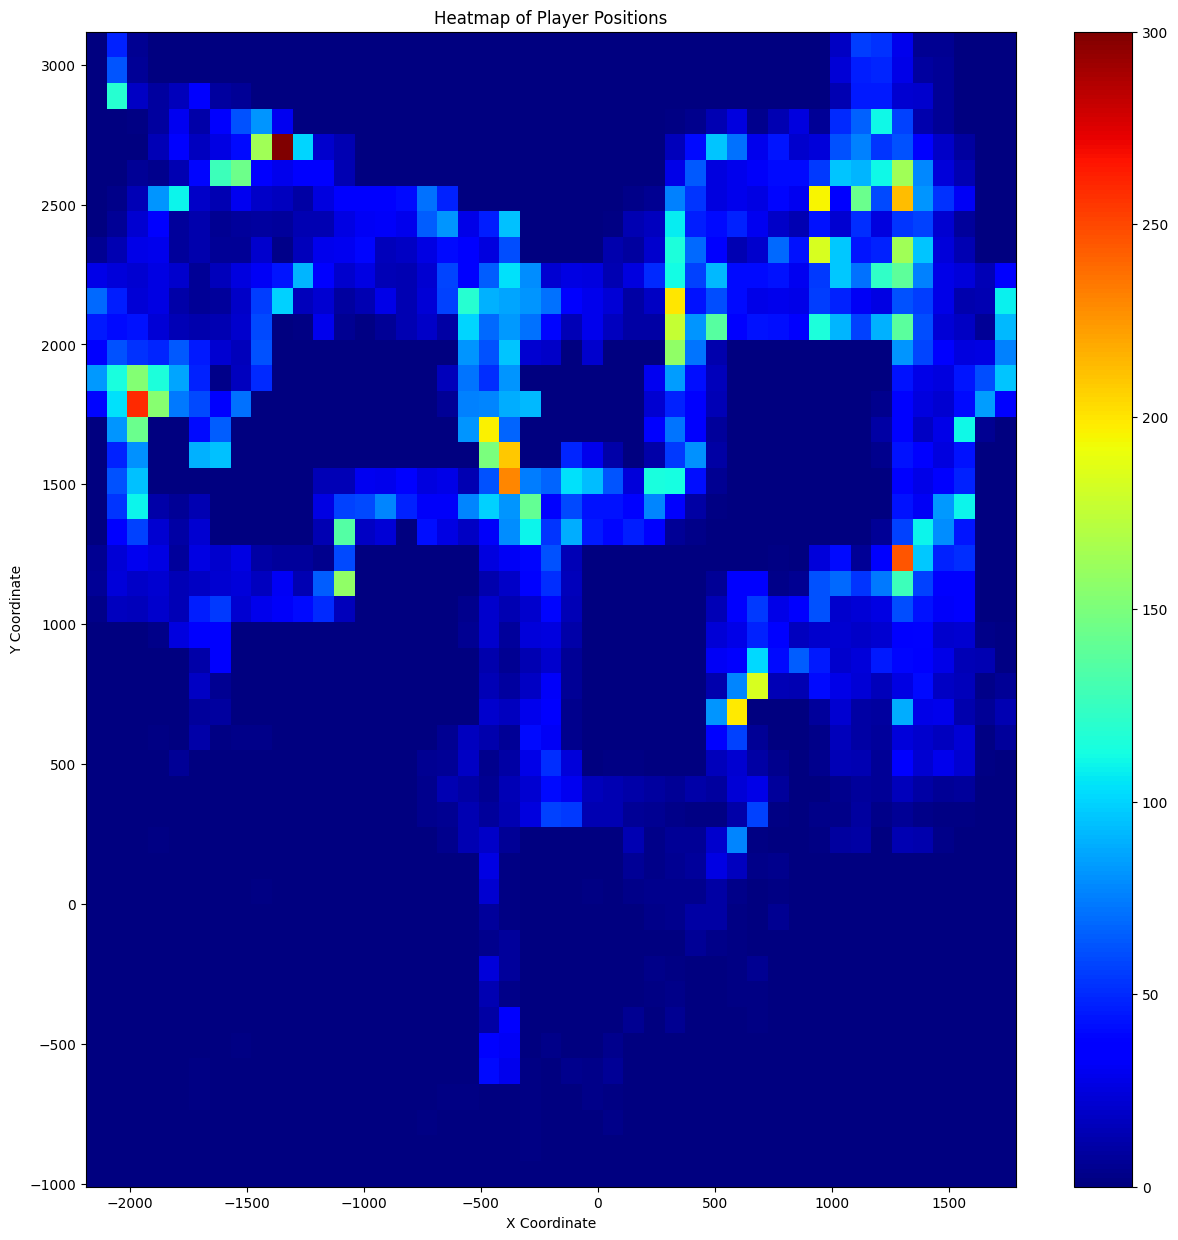

In [25]:
df2x = df_dead['lastKnownPosition'].apply(lambda x: x[0])
df2y = df_dead['lastKnownPosition'].apply(lambda x: x[1])

plt.figure(figsize=(15, 15))
plt.hist2d(df2x, df2y, bins=(45,45), cmap=plt.cm.jet)
plt.colorbar()
plt.title("Heatmap of Player Positions")
plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")
plt.show()

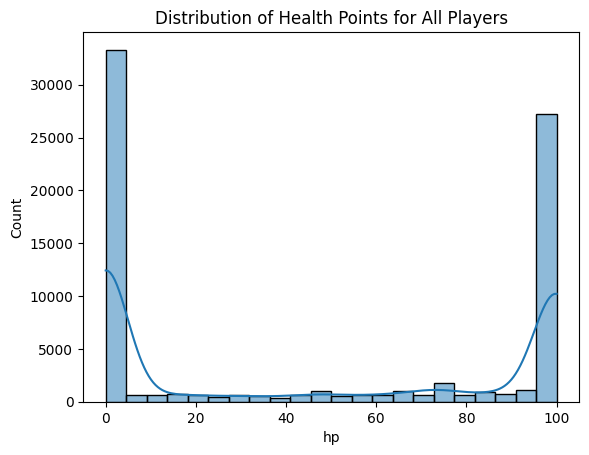

In [26]:
sns.histplot(df_team['hp'], kde=True)
plt.title('Distribution of Health Points for All Players')
plt.show()

# sns.boxplot(x='hp', data=df1)
# plt.title('Box Plot of Health Points')
# plt.show()

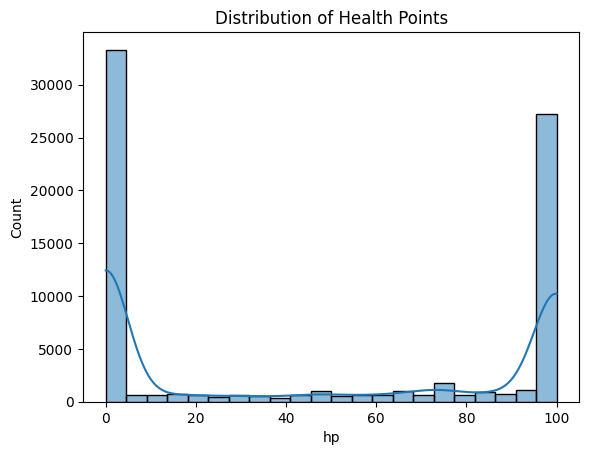

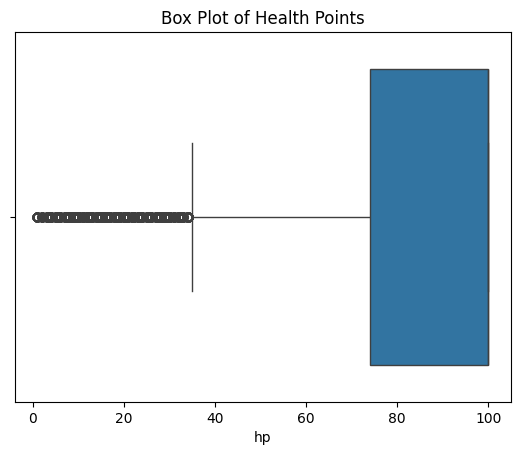

In [27]:
sns.histplot(df_team['hp'], kde=True)
plt.title('Distribution of Health Points')
plt.show()

sns.boxplot(x='hp', data=df1)
plt.title('Box Plot of Health Points')
plt.show()